### <h1 align = "center">"Diagnosis of Diabetes Using Machine Learning Techniques"<h1><h4 align = "center">Mr. Bhushan Khairkhar , Feb 2019<h4>

**Problem Description**
<p  style="text-align:justify">
About one in seven U.S. adults has diabetes now, according to the Centers for Disease Control and Prevention. But by 2050, that rate could skyrocket to as many as one in three. With this in mind, this is what we are going to do today: Learning how to use Machine Learning to help us predict Diabetes. Let’s get started!
<p  style="text-align:justify">

## 1. Introduction 
<p  style="text-align:justify">
Acccording to NIH, "**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.
<p  style="text-align:justify">
Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.
<p  style="text-align:justify">
Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.<p  style="text-align:justify">

**What are the different types of diabetes?**
The most common types of diabetes are type 1, type 2, and gestational diabetes.<p  style="text-align:justify">

**Type 1 diabetes**
If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.<p  style="text-align:justify">

**Type 2 diabetes**
If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.<p  style="text-align:justify">

**Gestational diabetes**
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.<p  style="text-align:justify">

**Other types of diabetes**
Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes .
<p  style="text-align:justify">

## 2. The Data
The diabetes data set was originated from UCI Machine Learning Repository and can be downloaded from here [https://archive.ics.uci.edu/ml/datasets/Diabetes]

## 3. Load libraries and Read the Diabetes data
**Step -1 : Import datascience libraries**

In [1]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

**Step -2 : Load Dataset with pandas(pd)**

In [2]:
diabetes_data = pd.read_csv("F:/Projects/Python/Diagnosis of Diabetes Using Machine Learning Techniques/diabetes.csv")
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## 4. Overview of Data [Data Preprocessing]
**Step -1 : Head**
[Check for different medical predictor (independent) variables and one target (dependent) variable)

In [3]:
diabetes_data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<p  style="text-align:justify">
    
**The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.**
<p  style="text-align:justify">

In [4]:
print("dimension of diabetes data: {}".format(diabetes_data.shape))

dimension of diabetes data: (768, 9)


**The diabetes dataset consists of 768 data points, with 9 features each**

**Step -2 :  checking for missing values**

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Step -3 : Overview-Co-relation of Variables**

In [7]:
dataset = diabetes_data.copy()
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


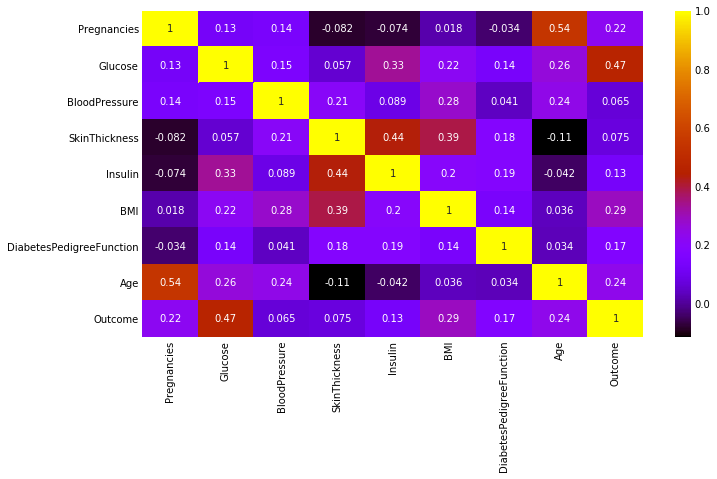

In [118]:
plt.figure(figsize=(10,6))
corr = dataset.corr()
sns.heatmap(corr,annot=True,cmap ='gnuplot')
plt.show()

## 5. Extracting Independent and Dependent Variable

In [73]:
X = dataset.iloc[:,:-1].values # independent variable
y = dataset.iloc[:,-1].values # dependent variable

### 5.1 :  Box Plot

In [74]:
# Lets Find keys from DataSet
dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

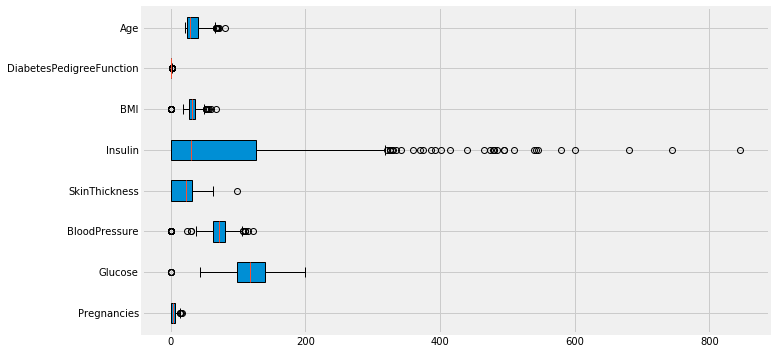

In [79]:
plt.figure(figsize=(10,6))
plt.boxplot(X,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()

#### 5.1.1: Feature Scaling
- Normalization (0 - 1)
- Standard Scaler (Z - score)

In [80]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [81]:
mms = MinMaxScaler() # 0 -1 
sc = StandardScaler() # z score

In [82]:
X_norm = mms.fit_transform(X)
X_sc = sc.fit_transform(X)

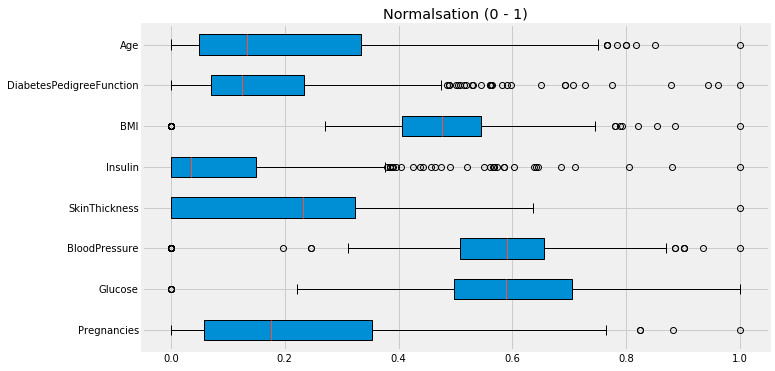

In [84]:
plt.figure(figsize=(10,6))
plt.boxplot(X_norm,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Normalsation (0 - 1)')
plt.show()

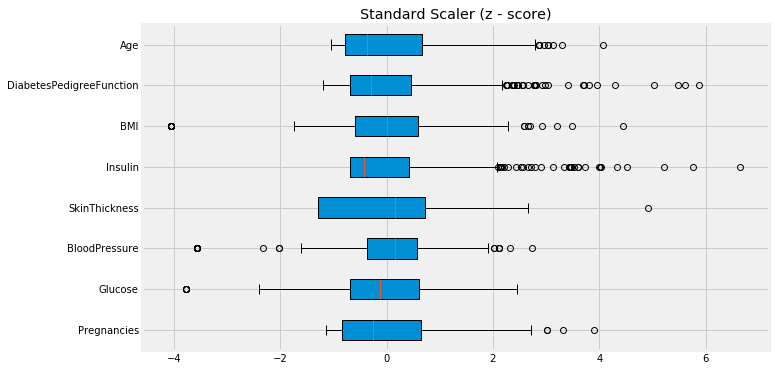

In [87]:
plt.figure(figsize=(10,6))
plt.boxplot(X_sc,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Standard Scaler (z - score)')
plt.show()

#### 5.1.2: Removing Outliers

In [88]:
Xo_sc = np.zeros((1,X_sc.shape[1]))
yo = np.zeros(1)
for i in range(len(X_sc)):
    if np.abs(X_sc[i:i+1]).max() < 3:
        Xo_sc = np.append(Xo_sc,X_sc[i:i+1],axis = 0)
        yo = np.append(yo,y[i])
        
Xo_sc = Xo_sc[1:]
yo = yo[1:]
Xo_sc.shape, yo.shape

((688, 8), (688,))

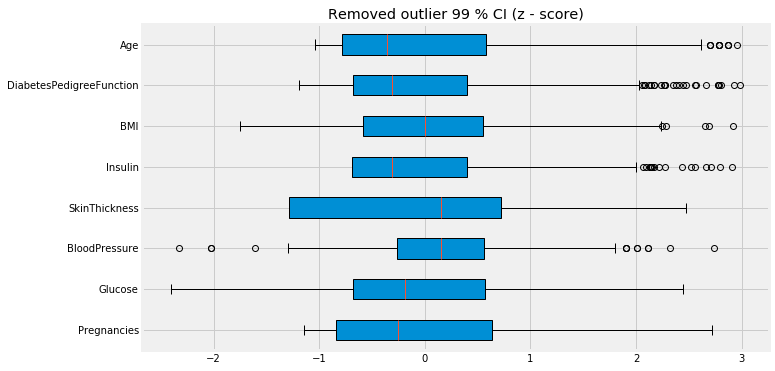

In [89]:
plt.figure(figsize=(10,6))
plt.boxplot(Xo_sc,vert=False,patch_artist=True,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.title('Removed outlier 99 % CI (z - score)')
plt.show()

### 5.2 :Splitting Data into training data and testing data

In [91]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2,
                                                   random_state=0)

In [92]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## 6. Buliding Machine Learning Model</a> 
Here we are Using following 07 machine learning models to predict the posibility of Diagnosis of Diabetes and later do the Evalauation of all ML models.<br>
   **6.1. Logistic Regression**<br> 
   **6.2. k-NN Algorithm-KNearestNeighbour**<br>
   **6.3. Support Vector Machine SVM**<br> 
   **6.4. DecisionTreeClassifier**<br>
   **6.5. Random Forest**<br> 
   **6.5. GradientBoosting** <br> 
   **6.7. Neural Networks**<br> 
  

In [93]:
# Data processing, metrics and modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

**Let’s create model for all Machine Learning Model**

In [103]:
model_log = LogisticRegression(C = 10.0) # Creating logistic regression model
model_knn = KNeighborsClassifier(n_neighbors=3) # Creating KNN model
model_svm = SVC(C=10.0,kernel='rbf') # Creating Support Vector Machine model
model_dt = DecisionTreeClassifier() # Creating Decision Tree model
model_rf = RandomForestClassifier(n_estimators=100) # Creating Random Forest model
model_gb = GradientBoostingClassifier(random_state=0) # Creating Gradient Boosting Classifier model
model_mlp = MLPClassifier(random_state=0) # Creating Neural Networks- MLPClassifier model

**Create the Training Model for Given Data**

In [104]:
model_log.fit(x_train,y_train) # fitting  logistic regression model
model_knn.fit(x_train,y_train) # fitting KNN model
model_svm.fit(x_train,y_train) # fitting Support Vector Machine model
model_dt.fit(x_train,y_train) # fitting Decision Tree model
model_rf.fit(x_train,y_train) # fitting Random Forest model
model_gb.fit(x_train, y_train) # fitting for Gradient Boosting Model
model_mlp.fit(x_train, y_train) # fitting for Neural Networks- MLP-multilayer perceptron Model
print('Models Trained Sucessfully !!!')

Models Trained Sucessfully !!!


## 7. Machine Learning Model Evaluation</a>
**7.1 Confusion Matrix**<br>
**7.2 Plot HeatMap**<br>
**7.3 Classification Report**<br> 
**7.4 Z Values**<br> 
**7.5 X_sc Values**

**7.1 Confusion Matrix** <br>
<p  style="text-align:justify">
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.<p  style="text-align:justify">

In [107]:
y_pred_log = model_log.predict(x_test) # predicted results for logistic regression model
y_pred_knn = model_knn.predict(x_test) # predicted results for KNN model
y_pred_svm = model_svm.predict(x_test) # predicted results for Support Vector Machine model
y_pred_dt = model_dt.predict(x_test) # predicted results for Decision Tree model
y_pred_rf = model_rf.predict(x_test) # predicted results for Random Forest model
y_pred_gb = model_gb.predict(x_test) # predicted results for Gradient Boosting Model
y_pred_mlp = model_mlp.predict(x_test) # predicted results for Neural Networks- MLP-multilayer perceptron Model
print('Models Predicted Sucessfully !!!')

Models Predicted Sucessfully !!!


In [108]:
# Data processing, metrics and modeling
from sklearn.metrics import confusion_matrix , classification_report

In [109]:
cm_log = confusion_matrix(y_test,y_pred_log) # confusion_matrix for logistic regression model
cm_knn = confusion_matrix(y_test,y_pred_knn) # confusion_matrix for KNN model
cm_svm = confusion_matrix(y_test,y_pred_svm) # confusion_matrix for Support Vector Machine model
cm_dt = confusion_matrix(y_test,y_pred_dt) # confusion_matrix for Decision Tree model
cm_rf = confusion_matrix(y_test,y_pred_rf) # confusion_matrix for Random Forest model
cm_gb= confusion_matrix(y_test,y_pred_gb) # confusion_matrix for Gradient Boosting Model
cm_mlp = confusion_matrix(y_test,y_pred_mlp) # confusion_matrix for Neural Networks- MLP multilayer perceptron Model


**7.2 Plot HeatMap**

In [112]:
# Stats
import seaborn as sns

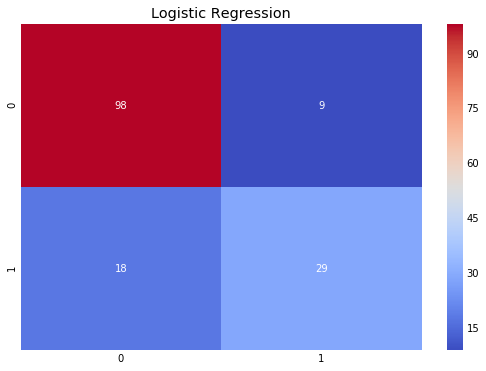

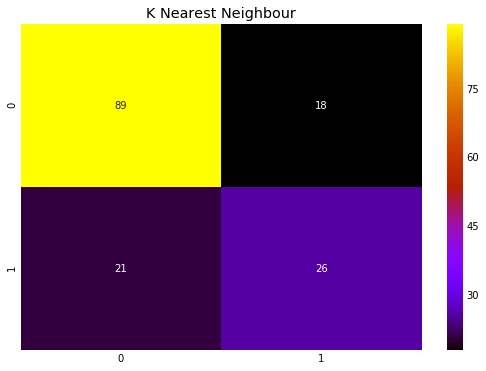

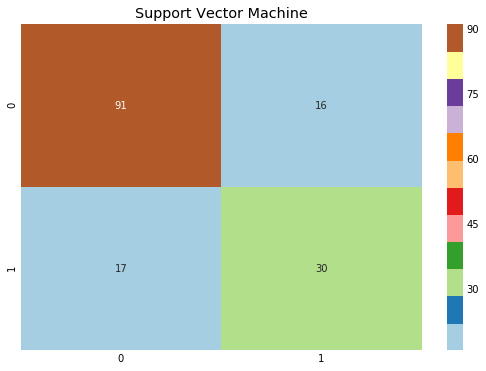

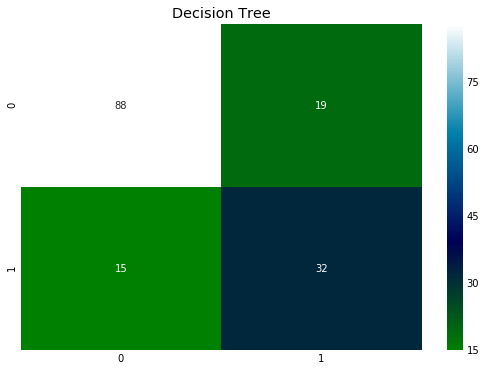

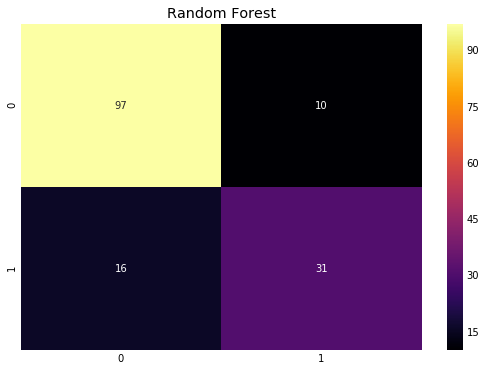

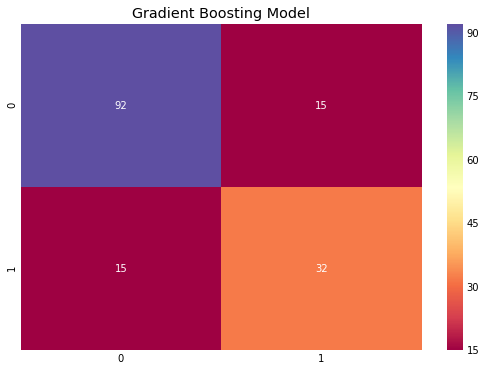

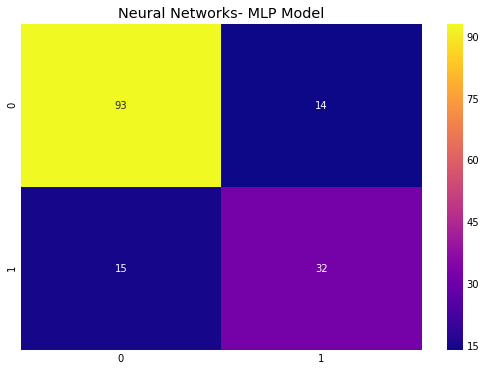

In [119]:
# Plot HeatMap For logistic regression model

plt.figure(figsize=(8,6))
sns.heatmap(cm_log,annot=True,cmap='coolwarm')
plt.title('Logistic Regression')
plt.show()

# Plot HeatMap For KNN model

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn,annot=True,cmap='gnuplot')
plt.title('K Nearest Neighbour')
plt.show()

# Plot HeatMap For Support Vector Machine model

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm,annot=True,cmap='Paired')
plt.title('Support Vector Machine')
plt.show()

# Plot HeatMap For Decision Tree model

plt.figure(figsize=(8,6))
sns.heatmap(cm_dt,annot=True,cmap='ocean')
plt.title('Decision Tree')
plt.show()

# Plot HeatMap For Random Forest model

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf,annot=True,cmap='inferno')
plt.title('Random Forest')
plt.show()

# Plot HeatMap For Gradient Boosting Model

plt.figure(figsize=(8,6))
sns.heatmap(cm_gb,annot=True,cmap='Spectral')
plt.title('Gradient Boosting Model')
plt.show()

# Plot HeatMap For Neural Networks- MLP Model

plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp,annot=True,cmap='plasma')
plt.title('Neural Networks- MLP Model')
plt.show()


**7.3 Classification Report**<br> 

In [120]:
# Create Classification Report for logistic regression model

cr_log = classification_report(y_test,y_pred_log)
print('\n'+'='*20+ 'Logistic Regression'+ "="*20+'\n')
print(cr_log)

# Create Classification Report for KNN model

cr_knn = classification_report(y_test,y_pred_knn)
print('\n'+'='*20+ 'K Nearest Neighbour'+ "="*20+'\n')
print(cr_knn)

# Create Classification Report for Support Vector Machine model

cr_svm = classification_report(y_test,y_pred_svm)
print('\n'+'='*20+ 'Support Vector Machine'+ "="*20+'\n')
print(cr_svm)

# Create Classification Report for Decision Tree model

cr_dt = classification_report(y_test,y_pred_dt)
print('\n'+'='*20+ 'Decision Tree'+ "="*20+'\n')
print(cr_dt)

# Create Classification Report for Random Forest model

cr_rf = classification_report(y_test,y_pred_rf)
print('\n'+'='*20+ 'Random Forest'+ "="*20+'\n')
print(cr_rf)

# Create Classification Report for Gradient Boosting Model

cr_gb = classification_report(y_test,y_pred_gb)
print('\n'+'='*20+ 'Gradient Boosting Model'+ "="*20+'\n')
print(cr_gb)

# Create Classification Report for Neural Networks- MLP Model

cr_mlp = classification_report(y_test,y_pred_mlp)
print('\n'+'='*20+ 'Neural Networks- MLP Model'+ "="*20+'\n')
print(cr_mlp)



====================Logistic Regression====================

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.62      0.68        47

avg / total       0.82      0.82      0.82       154


====================K Nearest Neighbour====================

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       107
          1       0.59      0.55      0.57        47

avg / total       0.74      0.75      0.74       154


====================Support Vector Machine====================

             precision    recall  f1-score   support

          0       0.84      0.85      0.85       107
          1       0.65      0.64      0.65        47

avg / total       0.78      0.79      0.79       154


====================Decision Tree====================

             precision    recall  f1-score   support

          0       0.85      0.82      0.84       107
   

**7.4: Standard Scaler (Z - score) - Calculate  z - values-**

In [121]:
print('Mean \n',sc.mean_)
print('Standard Deviation \n',sc.scale_)

Mean 
 [  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542]
Standard Deviation 
 [  3.36738361  31.95179591  19.34320163  15.94182863 115.16894926
   7.87902573   0.33111282  11.75257265]


**7.5 StandardScaler- X Transform ,Calculate as X_sc Values**

In [122]:
X_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Summary
